In [1]:
# import libraries & functions
from functions import *

In [2]:
# investigate data
conn = sqlite3.connect('northWind.sqlite')
cur = conn.cursor()

In [3]:
employees = get_df_from_SQL('Employee', cur)

In [4]:
cur.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cur.fetchall())

[('Employee',), ('Category',), ('Customer',), ('Shipper',), ('Supplier',), ('Order',), ('Product',), ('OrderDetail',), ('CustomerCustomerDemo',), ('CustomerDemographic',), ('Region',), ('Territory',), ('EmployeeTerritory',)]


In [5]:
get_df_from_SQL('Product', cur)

,Id,ProductName,SupplierId,CategoryId,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
0,1,Chai,1,1,10 boxes x 20 bags,18.00,39,0,10,0
1,2,Chang,1,1,24 - 12 oz bottles,19.00,17,40,25,0
2,3,Aniseed Syrup,1,2,12 - 550 ml bottles,10.00,13,70,25,0
3,4,Chef Anton's Cajun Seasoning,2,2,48 - 6 oz jars,22.00,53,0,0,0
4,5,Chef Anton's Gumbo Mix,2,2,36 boxes,21.35,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
72,73,Röd Kaviar,17,8,24 - 150 g jars,15.00,101,0,5,0
73,74,Longlife Tofu,4,7,5 kg pkg.,10.00,4,20,5,0
74,75,Rhönbräu Klosterbier,12,1,24 - 0.5 l bottles,7.75,125,0,25,0
75,76,Lakkalikööri,23,1,500 ml,18.00,57,0,20,0


In [6]:
cur.execute('''SELECT * FROM OrderDetail;''')

In [7]:
order_details = get_df_from_SQL('OrderDetail', cur)
order_details.head()

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount
0,10248/11,10248,11,14.0,12,0.0
1,10248/42,10248,42,9.8,10,0.0
2,10248/72,10248,72,34.8,5,0.0
3,10249/14,10249,14,18.6,9,0.0
4,10249/51,10249,51,42.4,40,0.0


In [8]:
order_details['TotalPrice'] = (order_details['UnitPrice'] * order_details['Quantity']) * (1 - order_details['Discount'])
order_details[0:10]

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount,TotalPrice
0,10248/11,10248,11,14.0,12,0.00,168.00
1,10248/42,10248,42,9.8,10,0.00,98.00
2,10248/72,10248,72,34.8,5,0.00,174.00
3,10249/14,10249,14,18.6,9,0.00,167.40
4,10249/51,10249,51,42.4,40,0.00,1696.00
5,10250/41,10250,41,7.7,10,0.00,77.00
6,10250/51,10250,51,42.4,35,0.15,1261.40
7,10250/65,10250,65,16.8,15,0.15,214.20
8,10251/22,10251,22,16.8,6,0.05,95.76
9,10251/57,10251,57,15.6,15,0.05,222.30


In [9]:
order_details['TotalPrice'].sort_values(ascending=False)[0:20], len(order_details)
employees['Title'].unique()

array(['Sales Representative', 'Vice President, Sales', 'Sales Manager',
       'Inside Sales Coordinator'], dtype=object)

In [10]:
order_details['TotalPrice'].mean()
order_details['Discount'].unique()

array([0.  , 0.15, 0.05, 0.2 , 0.25, 0.1 , 0.02, 0.03, 0.04, 0.06, 0.01])

In [11]:
cur.execute('''SELECT * FROM 'Order' ORDER BY Id;''')
orders = pd.DataFrame(cur.fetchall())
orders.columns = [i[0] for i in cur.description]
orders.head()

,Id,CustomerId,EmployeeId,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry
0,10248,VINET,5,2012-07-04,2012-08-01,2012-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,Western Europe,51100,France
1,10249,TOMSP,6,2012-07-05,2012-08-16,2012-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,Western Europe,44087,Germany
2,10250,HANAR,4,2012-07-08,2012-08-05,2012-07-12,2,65.83,Hanari Carnes,"Rua do Paço, 67",Rio de Janeiro,South America,05454-876,Brazil
3,10251,VICTE,3,2012-07-08,2012-08-05,2012-07-15,1,41.34,Victuailles en stock,"2, rue du Commerce",Lyon,Western Europe,69004,France
4,10252,SUPRD,4,2012-07-09,2012-08-06,2012-07-11,2,51.30,Suprêmes délices,"Boulevard Tirou, 255",Charleroi,Western Europe,B-6000,Belgium


# Question 1: Is there a difference in quantity of products sold by discount rate? 

In [12]:
# obtain necessary data

## {Put test name here}
H0: 

HA:

In [13]:
# perform test

## Conclusion

## EffectSize/PowerAnalysis/Tukey Testing (if needed)

# Question 2: Is there a difference in number of orders and territory? 

In [14]:
# obtain necessary data

## {Put test name here}
H0: 

HA:

In [15]:
# perform test

## Conclusion

# Question 3: Is there any connection between employees and the total prices of the sales they make?

In [16]:
# obtain necessary data
employees = get_df_from_SQL('Employee', cur)
order_details = get_df_from_SQL('OrderDetail', cur)

cur.execute('''SELECT * FROM 'Order' ORDER BY Id;''')
orders = pd.DataFrame(cur.fetchall())
orders.columns = [i[0] for i in cur.description]
orders.head()

# add total price to the order_details sheet
order_details['TotalPrice'] = (order_details['UnitPrice'] * order_details['Quantity']) * (1 - order_details['Discount'])

#merge all sheets
employees.rename(columns={'Id':'EmployeeId'}, inplace=True)
orders.rename(columns={'Id':'OrderId'}, inplace=True)
merged = employees.merge(orders, on='EmployeeId').merge(order_details, on='OrderId')

# chopping out the useless stuff and narrowing our focus on sales reps
emp_w_revenue = merged[['EmployeeId', 'FirstName', 'LastName', 'Title', 'OrderId', 'ProductId', 'UnitPrice', 'Quantity', 'Discount', 'TotalPrice']]
sales_reps = emp_w_revenue.loc[emp_w_revenue['Title'] == 'Sales Representative']
sales_reps.head()

,EmployeeId,FirstName,LastName,Title,OrderId,ProductId,UnitPrice,Quantity,Discount,TotalPrice
0,1,Nancy,Davolio,Sales Representative,10258,2,15.2,50,0.2,608.00
1,1,Nancy,Davolio,Sales Representative,10258,5,17.0,65,0.2,884.00
2,1,Nancy,Davolio,Sales Representative,10258,32,25.6,6,0.2,122.88
3,1,Nancy,Davolio,Sales Representative,10270,36,15.2,30,0.0,456.00
4,1,Nancy,Davolio,Sales Representative,10270,43,36.8,25,0.0,920.00


In [17]:
# distributions for each sales rep
sales_reps_tp_dists = {}
for rep in sales_reps['FirstName'].unique():
    sales_reps_tp_dists[rep] = np.array(sales_reps.loc[sales_reps['FirstName']==rep].groupby('OrderId').sum()['TotalPrice'])

# print out basic stats for each sales rep
for name in sales_reps_tp_dists:
    print(f"{name}'s average sales price was {round(sales_reps_tp_dists[name].mean(), 2)}, and their total sales were {round(sales_reps_tp_dists[name].sum(), 2)}")

Nancy's average sales price was 1561.85, and their total sales were 192107.6
Janet's average sales price was 1596.95, and their total sales were 202812.84
Margaret's average sales price was 1492.89, and their total sales were 232890.85
Michael's average sales price was 1103.18, and their total sales were 73913.13
Robert's average sales price was 1730.11, and their total sales were 124568.24
Anne's average sales price was 1797.86, and their total sales were 77308.07


(0, 10000)

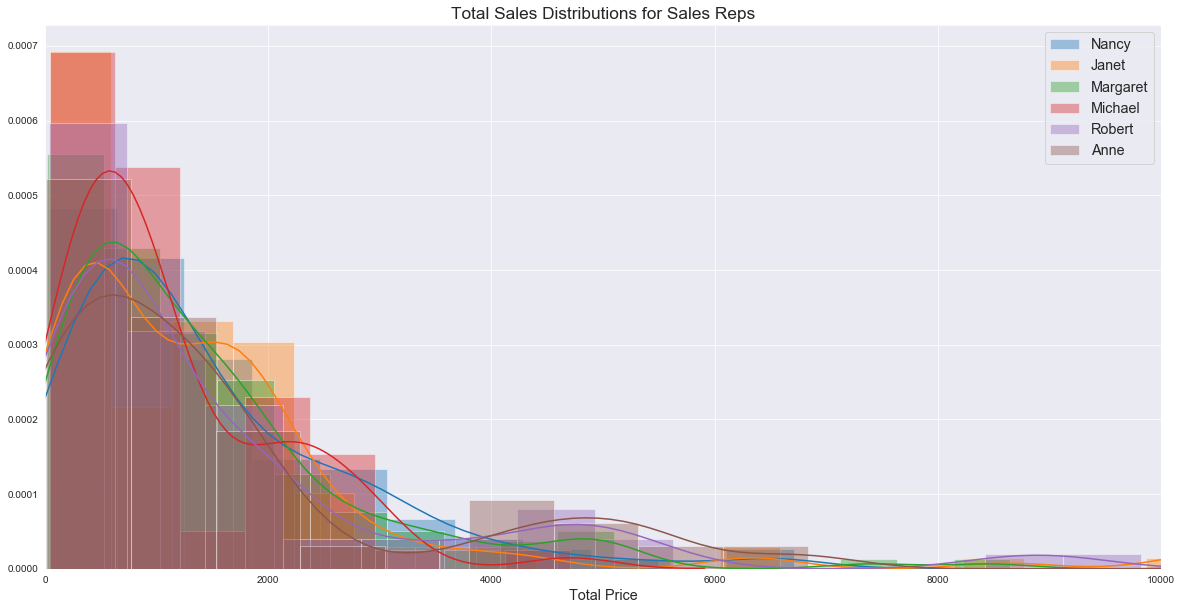

In [18]:
# a graph of the distributions of each sales reps total sales price per order
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(20,10))
for rep in sales_reps['FirstName'].unique():
    ax = sns.distplot(sales_reps.loc[sales_reps['FirstName']==rep].groupby('OrderId').sum()['TotalPrice'], label=rep)
ax.legend(fontsize='x-large')
ax.set_title('Total Sales Distributions for Sales Reps', size='xx-large')
ax.set_xlabel('Total Price', size='x-large')
ax.set_xlim(left=0, right=10000)

In [19]:
# the data doesn't look normal, but let's check
detect_abnormality(sales_reps_tp_dists.values())

The distribution at index 0 is not normally distributed
The distribution at index 1 is not normally distributed
The distribution at index 2 is not normally distributed
The distribution at index 3 is not normally distributed
The distribution at index 4 is not normally distributed
The distribution at index 5 is not normally distributed


Text(0.5, 0, 'Total Price')

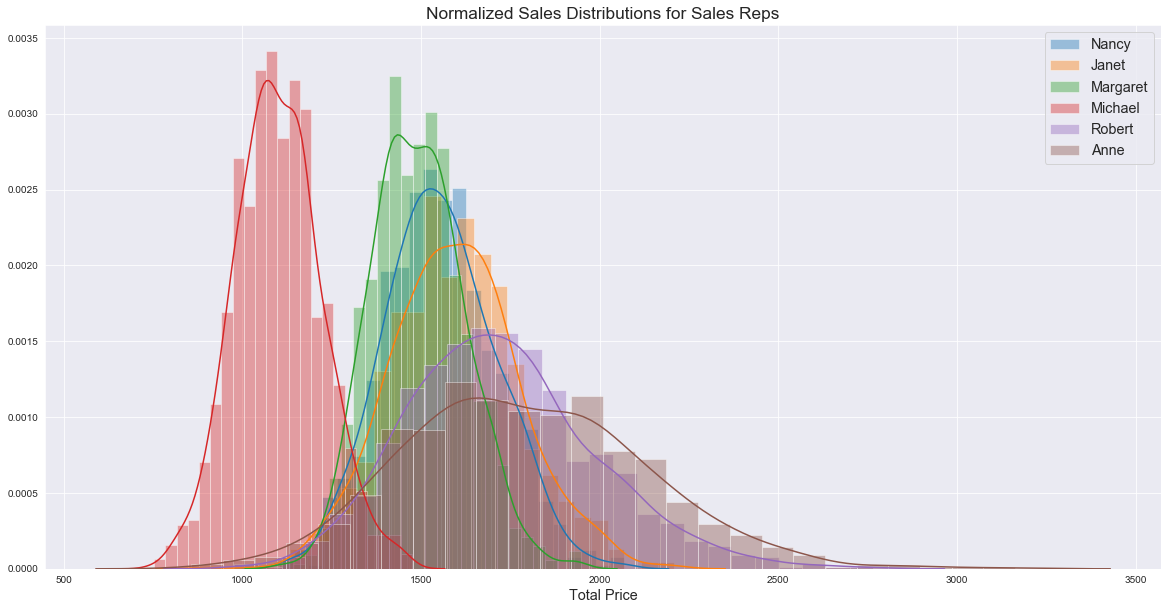

In [20]:
# so we'll use a bootstraping method to get normal distrubtions for each sales rep
reps_bstrap_dists = {}
for name in sales_reps_tp_dists.keys():
    reps_bstrap_dists[name] = bootstrap_em(sales_reps_tp_dists[name], n=1000)

fig, ax = plt.subplots(figsize=(20, 10))
for name in reps_bstrap_dists.keys():
    sns.distplot(reps_bstrap_dists[name], label=name)
ax.legend(fontsize='x-large')
ax.set_title('Normalized Sales Distributions for Sales Reps', size='xx-large')
ax.set_xlabel('Total Price', size='x-large')

In [21]:
# set data into a dataframe for testing
rep_w_prices = pd.DataFrame.from_dict(reps_bstrap_dists, orient='index').reset_index()
rep_w_prices = pd.melt(rep_w_prices, id_vars=["index"], value_name=0).drop(['variable'],axis=1).sort_values('index')
rep_w_prices = rep_w_prices.rename(columns={'index':'Name', 0:'TotalPrice'})
print(rep_w_prices.describe())
rep_w_prices.head()


        TotalPrice
count  6000.000000
mean   1542.388454
std     306.076697
min     753.043007
25%    1365.296726
50%    1538.404108
75%    1715.009428
max    3162.392860


,Name,TotalPrice
2999,Anne,1805.580651
2609,Anne,2203.624919
2603,Anne,2219.914837
2597,Anne,2099.862372
2591,Anne,1661.741279


## Tukey comparison of sales reps and total price of their sales
H0: there is no connection between who the sales rep is and the sample mean of the total price of their sales

HA: there is some connection between who the sales rep is and the sample mean of the total price of their sales

In [22]:
# first we conduct an ANOVA test to see if there are any differences at all. 
# if there are, we can use Tukey to get a better understanding of what's going on
formula = 'TotalPrice ~ C(Name)'

anova_test(formula, rep_w_prices)

,sum_sq,df,F,PR(>F)
C(Name),2.935045e+08,5.0,1310.442361,0.0
Residual,2.684995e+08,5994.0,NaN,NaN


In [23]:
# there seems to be significant difference between the employees and the sample means of their total price per order.
# because we are comparing multiple variables, and we wanted to compare the different salespeople to one another 
# individually, a Tukey test was chosen
reps_comp = pairwise_tukeyhsd(endog=rep_w_prices['TotalPrice'], groups=rep_w_prices['Name'], alpha=0.05)
print(reps_comp)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
 group1   group2   meandiff p-adj   lower     upper   reject
------------------------------------------------------------
    Anne    Janet -195.5618 0.001 -222.5431 -168.5804   True
    Anne Margaret -296.9064 0.001 -323.8878 -269.9251   True
    Anne  Michael -688.6226 0.001  -715.604 -661.6413   True
    Anne    Nancy -235.8326 0.001 -262.8139 -208.8512   True
    Anne   Robert  -67.5433 0.001  -94.5247   -40.562   True
   Janet Margaret -101.3447 0.001  -128.326  -74.3633   True
   Janet  Michael -493.0608 0.001 -520.0422 -466.0795   True
   Janet    Nancy  -40.2708 0.001  -67.2522  -13.2895   True
   Janet   Robert  128.0184 0.001  101.0371  154.9998   True
Margaret  Michael -391.7162 0.001 -418.6975 -364.7348   True
Margaret    Nancy   61.0739 0.001   34.0925   88.0552   True
Margaret   Robert  229.3631 0.001  202.3817  256.3445   True
 Michael    Nancy    452.79 0.001  425.8087  479.7714   True
 Michael   Robert  621.0

In [24]:
# since almost none of the null hypotheses were rejected, we reran the test with a lower alpha to see just how sure we could be
reps_comp = pairwise_tukeyhsd(endog=rep_w_prices['TotalPrice'], groups=rep_w_prices['Name'], alpha=0.01)
print(reps_comp)

    Multiple Comparison of Means - Tukey HSD, FWER=0.01     
 group1   group2   meandiff p-adj   lower     upper   reject
------------------------------------------------------------
    Anne    Janet -195.5618 0.001  -227.415 -163.7085   True
    Anne Margaret -296.9064 0.001 -328.7597 -265.0532   True
    Anne  Michael -688.6226 0.001 -720.4759 -656.7693   True
    Anne    Nancy -235.8326 0.001 -267.6859 -203.9793   True
    Anne   Robert  -67.5433 0.001  -99.3966  -35.6901   True
   Janet Margaret -101.3447 0.001 -133.1979  -69.4914   True
   Janet  Michael -493.0608 0.001 -524.9141 -461.2076   True
   Janet    Nancy  -40.2708 0.001  -72.1241   -8.4175   True
   Janet   Robert  128.0184 0.001   96.1652  159.8717   True
Margaret  Michael -391.7162 0.001 -423.5694 -359.8629   True
Margaret    Nancy   61.0739 0.001   29.2206   92.9271   True
Margaret   Robert  229.3631 0.001  197.5098  261.2164   True
 Michael    Nancy    452.79 0.001  420.9368  484.6433   True
 Michael   Robert  621.0

In [25]:
# let's calculate effect sizes for these comparisons
rep_pairs = combinations(reps_bstrap_dists.keys(), 2)
for pair in list(rep_pairs):
    e_size = cohens_d(rep_w_prices.loc[rep_w_prices['Name']==pair[0]]['TotalPrice'], rep_w_prices.loc[rep_w_prices['Name']==pair[1]]['TotalPrice'])
    print(f'The effect size for a comparison between {pair[0].upper()} and {pair[1].upper()} is {round(e_size, 2)}')

The effect size for a comparison between NANCY and JANET is -0.24
The effect size for a comparison between NANCY and MARGARET is 0.43
The effect size for a comparison between NANCY and MICHAEL is 3.26
The effect size for a comparison between NANCY and ROBERT is -0.78
The effect size for a comparison between NANCY and ANNE is -0.91
The effect size for a comparison between JANET and MARGARET is 0.65
The effect size for a comparison between JANET and MICHAEL is 3.23
The effect size for a comparison between JANET and ROBERT is -0.57
The effect size for a comparison between JANET and ANNE is -0.73
The effect size for a comparison between MARGARET and MICHAEL is 3.14
The effect size for a comparison between MARGARET and ROBERT is -1.1
The effect size for a comparison between MARGARET and ANNE is -1.17
The effect size for a comparison between MICHAEL and ROBERT is -3.03
The effect size for a comparison between MICHAEL and ANNE is -2.75
The effect size for a comparison between ROBERT and ANNE 

In [26]:
# we can also sum the effect sizes for each salesperson to get a kind of absolute comparison to all others. 
for rep in reps_bstrap_dists.keys():
    e_sizes = []
    for name in reps_bstrap_dists.keys():
        if rep != name:
            e_sizes.append(cohens_d(rep_w_prices.loc[rep_w_prices['Name']==rep]['TotalPrice'], rep_w_prices.loc[rep_w_prices['Name']==name]['TotalPrice']))
    print(f"{rep}'s cummulative effect size is {sum(e_sizes)}")

Nancy's cummulative effect size is 1.7657976344610664
Janet's cummulative effect size is 2.8188863483589093
Margaret's cummulative effect size is -0.20678787662598297
Michael's cummulative effect size is -15.415238151420887
Robert's cummulative effect size is 5.2571748095835495
Anne's cummulative effect size is 5.780167235643347


The Tukey test rejected the null in almost every case, up to an alpha of 1%. This means that each employee's sample mean was actually quite distinct from those of their coworkers. We can thus reject the null hypothesis; different salespeople do in fact get different total sales prices. The exception to this is Janet and Nancy, who's performances on this metric are quite close. This is corrobarated by the plots we saw earlier, where they're sample distributions overlapped significantly.

Comparing the effect sizes, we can see that Michael tends to lag significantly behind everyone else. Aside from that, we still have a number of large effect sizes. If we look at effect size sums, it's clear that Robert and Anne are among the best performing salespeople according to the metric of sample mean total price per order.

Building on this, now that the data has been a bit organized, it is easy to compare salespeople on other metrics as well. So we turned next to look at how many items each salesperson averaged on their orders.

In [27]:
# make a dictionary of salespeople and number of items for each of their orders
sales_reps_qn_dists = {}
for rep in sales_reps['FirstName'].unique():
    sales_reps_qn_dists[rep] = np.array(sales_reps.loc[sales_reps['FirstName']==rep].groupby('OrderId').sum()['Quantity'])

# print out basic stats for each sales rep
for name in sales_reps_qn_dists.keys():
    print(f"{name}'s average number of items per order was {round(sales_reps_qn_dists[name].mean(), 2)}, and their total number of items sold was {round(sales_reps_qn_dists[name].sum(), 2)}")

Nancy's average number of items per order was 63.51, and their total number of items sold was 7812
Janet's average number of items per order was 61.83, and their total number of items sold was 7852
Margaret's average number of items per order was 62.81, and their total number of items sold was 9798
Michael's average number of items per order was 52.64, and their total number of items sold was 3527
Robert's average number of items per order was 64.64, and their total number of items sold was 4654
Anne's average number of items per order was 62.09, and their total number of items sold was 2670


(0, 300)

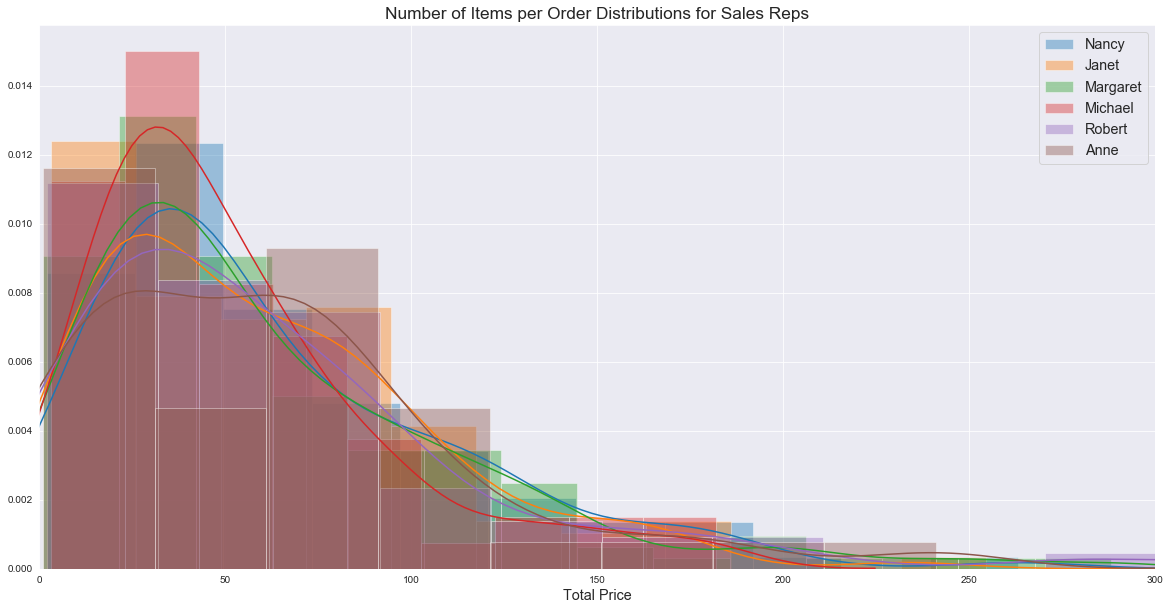

In [28]:
# plot the distribution
fig, ax = plt.subplots(figsize=(20,10))
for rep in sales_reps['FirstName'].unique():
    ax = sns.distplot(sales_reps_qn_dists[rep], label=rep)
ax.legend(fontsize='x-large')
ax.set_title('Number of Items per Order Distributions for Sales Reps', size='xx-large')
ax.set_xlabel('Total Price', size='x-large')
ax.set_xlim(0, 300)

In [29]:
# check normality
detect_abnormality(sales_reps_qn_dists.values())

The distribution at index 0 is not normally distributed
The distribution at index 1 is not normally distributed
The distribution at index 2 is not normally distributed
The distribution at index 3 is not normally distributed
The distribution at index 4 is not normally distributed
The distribution at index 5 is not normally distributed


Text(0.5, 0, 'Total Price')

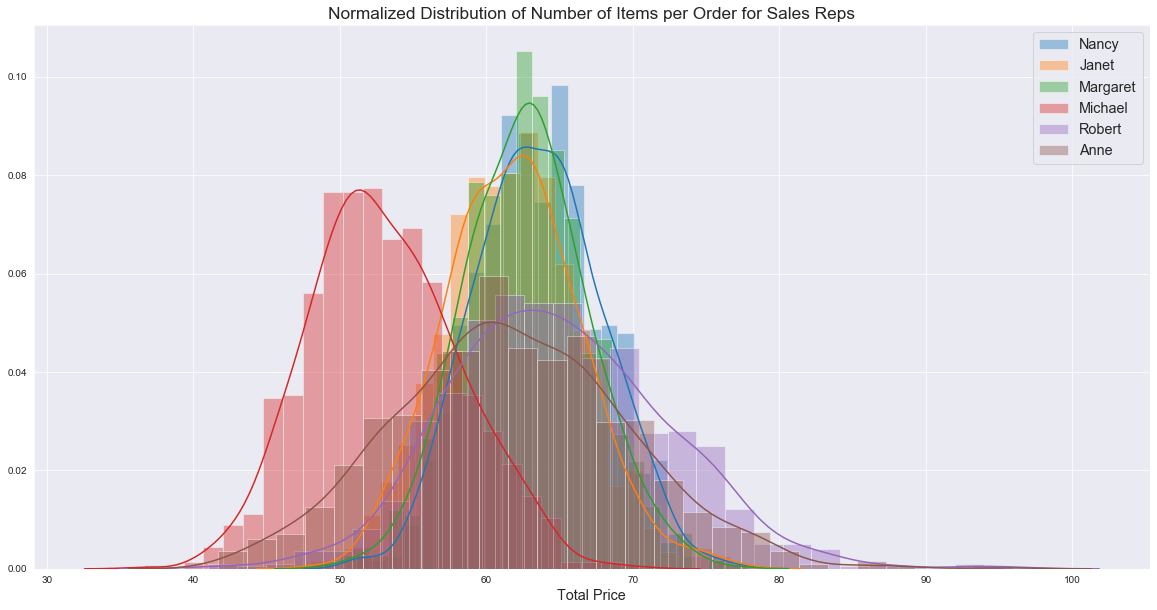

In [30]:
# use bootstrap to get normalized distribution and plot it
qn_bstrap = {}
for name in sales_reps_qn_dists.keys():
    qn_bstrap[name] = bootstrap_em(sales_reps_qn_dists[name], n=1000)

fig, ax = plt.subplots(figsize=(20, 10))
for name in qn_bstrap.keys():
    sns.distplot(qn_bstrap[name], label=name)
ax.legend(fontsize='x-large')
ax.set_title('Normalized Distribution of Number of Items per Order for Sales Reps', size='xx-large')
ax.set_xlabel('Total Price', size='x-large')

In [31]:
# turn into a dataframe for the statistical tests to use
rep_w_ordercount = pd.DataFrame.from_dict(qn_bstrap, orient='index').reset_index()
rep_w_ordercount = pd.melt(rep_w_ordercount, id_vars=["index"], value_name=0).drop(['variable'],axis=1).sort_values('index')
rep_w_ordercount = rep_w_ordercount.rename(columns={'index':'Name', 0:'OrderCount'}).dropna()
print(rep_w_ordercount.describe())
rep_w_ordercount

        OrderCount
count  6000.000000
mean     61.291171
std       6.941249
min      36.626866
25%      57.117429
50%      61.569444
75%      65.618926
max      95.916667


,Name,OrderCount
2999,Anne,67.162791
2609,Anne,51.930233
2603,Anne,62.372093
2597,Anne,51.441860
2591,Anne,68.767442
...,...,...
3100,Robert,59.013889
2254,Robert,63.583333
5326,Robert,61.180556
3748,Robert,54.055556


In [32]:
# ANOVA test
formula = 'OrderCount ~ C(Name)'

anova_test(formula, rep_w_ordercount)

,sum_sq,df,F,PR(>F)
C(Name),89475.426740,5.0,537.492787,0.0
Residual,199562.011311,5994.0,NaN,NaN


In [33]:
# Tukey test
reps_comp = pairwise_tukeyhsd(endog=rep_w_ordercount['OrderCount'], groups=rep_w_ordercount['Name'], alpha=0.05)
print(reps_comp)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1   group2  meandiff p-adj   lower    upper  reject
---------------------------------------------------------
    Anne    Janet   0.0737    0.9  -0.6619  0.8092  False
    Anne Margaret   1.0154 0.0012   0.2798   1.751   True
    Anne  Michael  -8.7203  0.001  -9.4558 -7.9847   True
    Anne    Nancy   1.8312  0.001   1.0957  2.5668   True
    Anne   Robert   3.1903  0.001   2.4547  3.9258   True
   Janet Margaret   0.9418 0.0036   0.2062  1.6773   True
   Janet  Michael  -8.7939  0.001  -9.5295 -8.0583   True
   Janet    Nancy   1.7576  0.001    1.022  2.4932   True
   Janet   Robert   3.1166  0.001    2.381  3.8522   True
Margaret  Michael  -9.7357  0.001 -10.4712 -9.0001   True
Margaret    Nancy   0.8158 0.0196   0.0803  1.5514   True
Margaret   Robert   2.1748  0.001   1.4393  2.9104   True
 Michael    Nancy  10.5515  0.001   9.8159 11.2871   True
 Michael   Robert  11.9105  0.001  11.1749 12.6461   True
   Nancy   Rob

In [34]:
# get effect sizes
rep_pairs = combinations(qn_bstrap.keys(), 2)
for pair in list(rep_pairs):
    e_size = cohens_d(rep_w_ordercount.loc[rep_w_ordercount['Name']==pair[0]]['OrderCount'], rep_w_ordercount.loc[rep_w_ordercount['Name']==pair[1]]['OrderCount'])
    print(f'The effect size for a comparison between {pair[0].upper()} and {pair[1].upper()} is {round(e_size, 2)}')

The effect size for a comparison between NANCY and JANET is 0.4
The effect size for a comparison between NANCY and MARGARET is 0.19
The effect size for a comparison between NANCY and MICHAEL is 2.25
The effect size for a comparison between NANCY and ROBERT is -0.22
The effect size for a comparison between NANCY and ANNE is 0.29
The effect size for a comparison between JANET and MARGARET is -0.21
The effect size for a comparison between JANET and MICHAEL is 1.82
The effect size for a comparison between JANET and ROBERT is -0.51
The effect size for a comparison between JANET and ANNE is 0.01
The effect size for a comparison between MARGARET and MICHAEL is 2.09
The effect size for a comparison between MARGARET and ROBERT is -0.36
The effect size for a comparison between MARGARET and ANNE is 0.16
The effect size for a comparison between MICHAEL and ROBERT is -1.88
The effect size for a comparison between MICHAEL and ANNE is -1.32
The effect size for a comparison between ROBERT and ANNE is 

In [35]:
# get cummulative effect sizes
for rep in qn_bstrap.keys():
    e_sizes = []
    for name in qn_bstrap.keys():
        if rep != name:
            e_sizes.append(cohens_d(rep_w_ordercount.loc[rep_w_ordercount['Name']==rep]['OrderCount'], rep_w_ordercount.loc[rep_w_ordercount['Name']==name]['OrderCount']))
    print(f"{rep}'s cummulative effect size is {sum(e_sizes)}")

Nancy's cummulative effect size is 2.8964665069369575
Janet's cummulative effect size is 0.716413726826615
Margaret's cummulative effect size is 1.911127376876556
Michael's cummulative effect size is -9.351317487974537
Robert's cummulative effect size is 3.3878424088297354
Anne's cummulative effect size is 0.4394674685046737


## Conclusion

Here too we found substantial differences between each sales rep; with only Janet and Anne being so close as to be impossible to distinguish with 95% confidence. Interestingly, where Anne and Robert outperformed everyone on the total price of their orders, Anne actually doesn't have any impressive effect size here - one might imagine that she has many small orders with expensive items in them. Michael continues to underperform.